In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

Loading Dataset

In [ ]:
# loading dataset
weather_data =pd.read_csv("weather_dataset.csv", index_col="DATE")
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
1982-01-03,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,NaN,NaN,68,"H,,S",NaN,NaN,NaN,NaN
1982-01-15,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,NaN,NaN,65,"H,,S",77.0,",,S",NaN,NaN
1982-01-16,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,NaN,NaN,64,"H,,S",78.0,",,S",NaN,NaN
1982-01-18,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,NaN,NaN,69,"H,,S",80.0,",,S",55.0,",,S"
1982-01-20,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,NaN,NaN,65,"H,,S",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,BGM00041936,"JESSORE, BG",23.184,89.161,6.1,0.0,",,S",66,"H,,S",NaN,NaN,56.0,",,S"
2024-12-28,BGM00041936,"JESSORE, BG",23.184,89.161,6.1,0.0,",,S",66,"H,,S",NaN,NaN,54.0,",,S"
2024-12-29,BGM00041936,"JESSORE, BG",23.184,89.161,6.1,0.0,",,S",67,"H,,S",NaN,NaN,56.0,",,S"


Number of features: 13
Number of data points: 94244


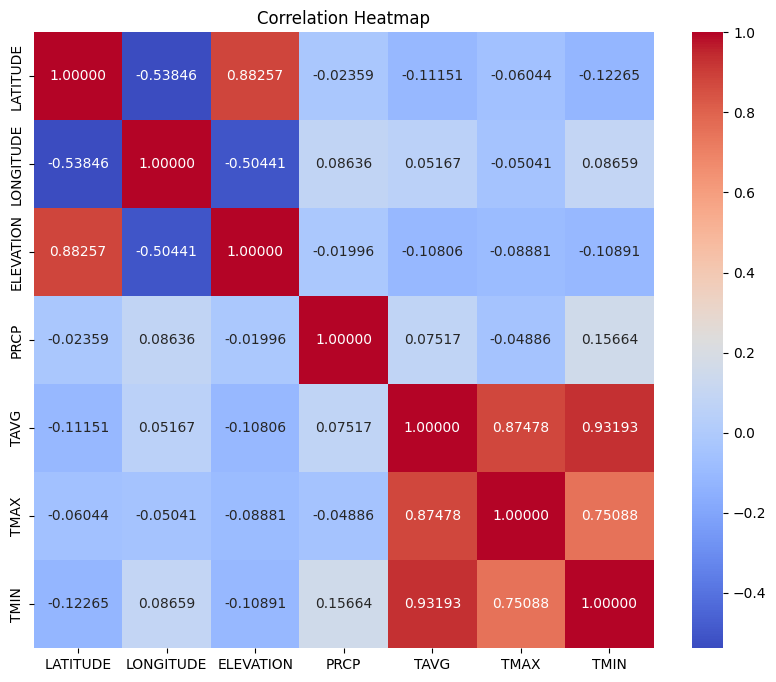

<ipython-input-3-e5a5da95c8ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')


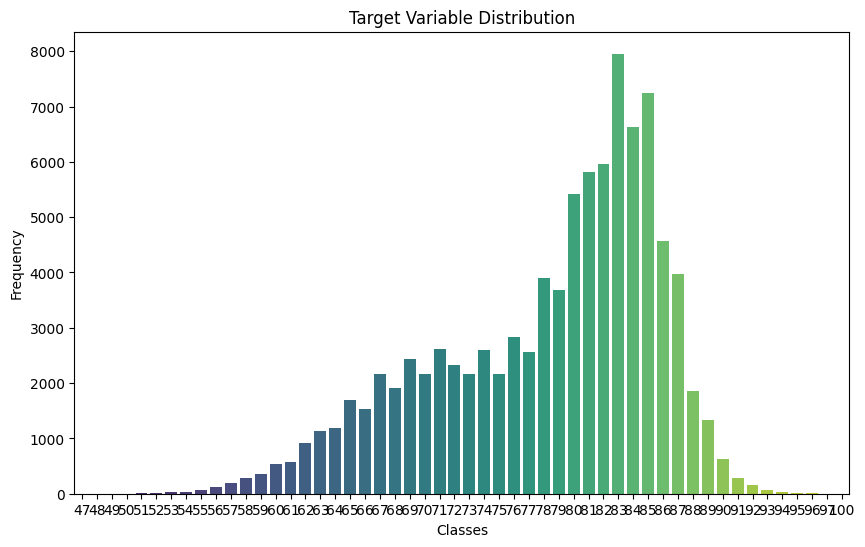

In [ ]:
num_features = weather_data.shape[1]
num_data_points = weather_data.shape[0]
print(f"Number of features: {num_features}")
print(f"Number of data points: {num_data_points}")


# heatmap's correlation
quantitative_data=weather_data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
corr_matrix = quantitative_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.5f')
plt.title('Correlation Heatmap')
plt.show()

# Imbalanced Dataset ('TAVG' = target variable)
target_variable = 'TAVG'
target_distribution = weather_data[target_variable].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


Dataset Preprocessing

In [ ]:
# checking null percentage

null_percentage =weather_data.apply(pd.isnull).sum()/weather_data.shape[0]
null_percentage
# weather.apply(pd.isnull).sum() gives us no of null values in each coloumn
# then we're going to divide it by total no of rows (weather.shape[0]) to get the percentage of null values in each coloumn

,0
STATION,0.000000
NAME,0.000000
LATITUDE,0.000000
LONGITUDE,0.000000
ELEVATION,0.000000
PRCP,0.142587
PRCP_ATTRIBUTES,0.142587
TAVG,0.000000
TAVG_ATTRIBUTES,0.000000
TMAX,0.193943


In [ ]:
# cleaning data/ removing coloumns with low null percentage

valid_columns = weather_data.columns[null_percentage<.15]

valid_columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP',
       'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES'],
      dtype='object')

In [ ]:
# imputing missing values

weather = weather_data[valid_columns].copy()
weather["target"]=weather.shift(-1)["TAVG"]  # target column is tomorrow's tavg. So aager din er shob column er data theke next din er tavg predict korlam
weather = weather.ffill()   # last jei value chilo shetai porer empty jaygay fill kore dibe (forward fill)
weather = weather.bfill() #forward fill korar poro prcp er null value theke gesilo karon shuru thekei null so erjonne backfill korlam

# converting date from str to date-time format
weather.index =pd.to_datetime(weather.index)
weather.dtypes

,0
STATION,object
NAME,object
LATITUDE,float64
LONGITUDE,float64
ELEVATION,float64
PRCP,float64
PRCP_ATTRIBUTES,object
TAVG,int64
TAVG_ATTRIBUTES,object
target,float64


In [ ]:
#checking null values again
weather.apply(pd.isnull).sum()

,0
STATION,0
NAME,0
LATITUDE,0
LONGITUDE,0
ELEVATION,0
PRCP,0
PRCP_ATTRIBUTES,0
TAVG,0
TAVG_ATTRIBUTES,0
target,0


In [ ]:
print("\nPreprocessed Dataset Overview:\n")
print(weather.dtypes)


Preprocessed Dataset Overview:

STATION             object
NAME                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
PRCP               float64
PRCP_ATTRIBUTES     object
TAVG                 int64
TAVG_ATTRIBUTES     object
target             float64
dtype: object


Feature Scaling

In [ ]:

quantitative_columns = weather.select_dtypes(include=['number']).columns
scaler = StandardScaler()
weather[quantitative_columns] = scaler.fit_transform(weather[quantitative_columns])  # qttive column gula standardize kortese by calcu mean ar standard deviation
print("\nFeature scaling applied to quantitative columns.")


Feature scaling applied to quantitative columns.


Data Splitting

In [ ]:
X = weather.drop(columns=['target', 'STATION', 'NAME', 'TAVG_ATTRIBUTES', 'PRCP_ATTRIBUTES'], errors='ignore')
y = weather['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nDataset split completed: {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples.")

# impute missing values in x train and x test
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)





Dataset split completed: 65970 training samples and 28274 testing samples.


Model Training and Testing

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)   # training model
    y_pred = model.predict(X_test)  #making predictions on test set

    mse = mean_squared_error(y_test, y_pred)  # avg sq diff betn predicted and actual values/ joto choto score toto better model
    mae = mean_absolute_error(y_test, y_pred)   # avg abs diff
    r2 = r2_score(y_test, y_pred)    #proportion of variance in TAVG/ joto closer to 1 toto better model

    results[name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    }

    print(f"{name} Results:\n MSE: {mse:.4f}\n MAE: {mae:.4f}\n R^2: {r2:.4f}")

# comparing results
print("\nModel Performance Comparison:\n")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")



Training Linear Regression...
Linear Regression Results:
 MSE: 0.1457
 MAE: 0.2851
 R^2: 0.8547

Training Random Forest...
Random Forest Results:
 MSE: 0.1463
 MAE: 0.2866
 R^2: 0.8542

Training K-Nearest Neighbors...
K-Nearest Neighbors Results:
 MSE: 0.1662
 MAE: 0.3089
 R^2: 0.8343

Model Performance Comparison:

Linear Regression: {'Mean Squared Error': 0.14572002856187938, 'Mean Absolute Error': 0.2850811708858311, 'R^2 Score': 0.8547212892964937}
Random Forest: {'Mean Squared Error': 0.14625771725618883, 'Mean Absolute Error': 0.28660893266714854, 'R^2 Score': 0.8541852290099288}
K-Nearest Neighbors: {'Mean Squared Error': 0.16624693849942113, 'Mean Absolute Error': 0.308886224466504, 'R^2 Score': 0.8342565457750724}


Comparison Analysis

<ipython-input-12-18fb8b4ab80a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_values, palette='Blues')
<ipython-input-12-18fb8b4ab80a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_values, palette='Greens')
<ipython-input-12-18fb8b4ab80a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_values, palette='Reds')


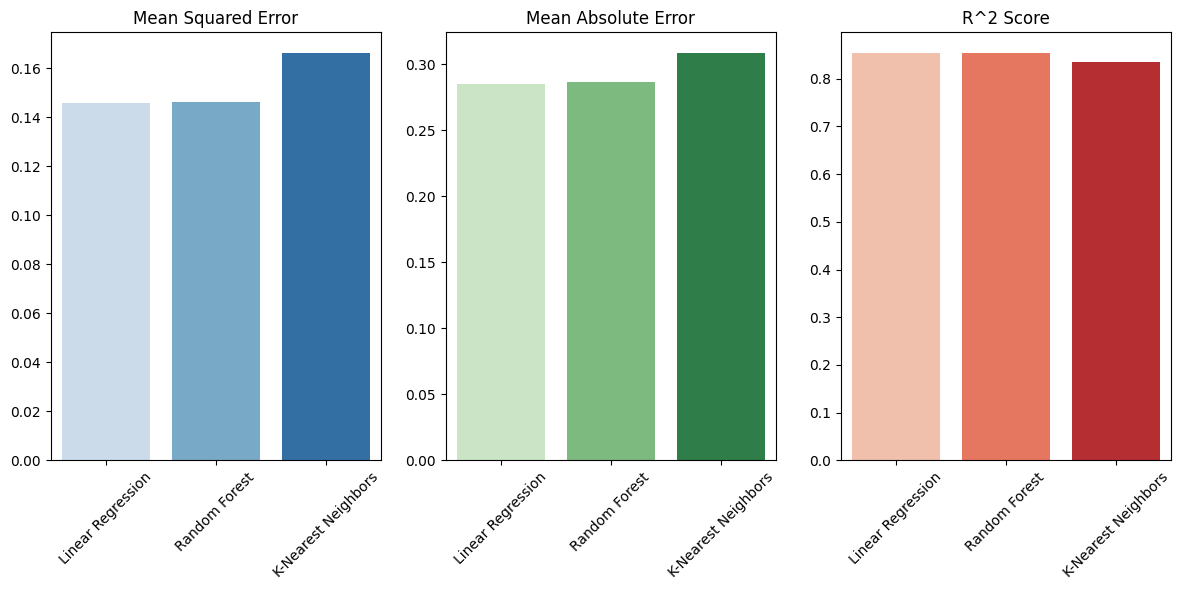

In [ ]:
model_names = list(results.keys())
mse_values = [metrics["Mean Squared Error"] for metrics in results.values()]
mae_values = [metrics["Mean Absolute Error"] for metrics in results.values()]
r2_values = [metrics["R^2 Score"] for metrics in results.values()]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=model_names, y=mse_values, palette='Blues')
plt.title('Mean Squared Error')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=model_names, y=mae_values, palette='Greens')
plt.title('Mean Absolute Error')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=model_names, y=r2_values, palette='Reds')
plt.title('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:

# Since this is a regression problem, precision, recall, and confusion matrices are not applicable.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

file_path = "weather_dataset.csv"
weather = pd.read_csv(file_path)


weather.replace(['H,,S', ',,S'], np.nan, inplace=True)

numeric_cols = ['PRCP', 'TAVG', 'TMAX', 'TMIN']
for col in numeric_cols:
    weather[col] = pd.to_numeric(weather[col], errors='coerce')

imputer = SimpleImputer(strategy='mean')
weather[numeric_cols] = imputer.fit_transform(weather[numeric_cols])

scaler = MinMaxScaler()
weather[['LATITUDE', 'LONGITUDE', 'ELEVATION']] = scaler.fit_transform(weather[['LATITUDE', 'LONGITUDE', 'ELEVATION']])

predictors = ['LATITUDE', 'LONGITUDE', 'ELEVATION']
target_cols = ['TAVG', 'TMAX', 'TMIN', 'PRCP']

X = weather[predictors]
y = weather[target_cols]

model = LinearRegression()
model.fit(X, y)

print("Enter the following details to predict the weather:")
station = input("Station Name (e.g., OSMANY INTERNATIONAL, BG): ")
date = input("Date (YYYY-MM-DD): ")
latitude = float(input("Latitude (e.g., 24.963): "))
longitude = float(input("Longitude (e.g., 91.867): "))
elevation = float(input("Elevation (e.g., 15.2): "))

scaled_latitude = scaler.transform([[latitude, longitude, elevation]])[0][0]
scaled_longitude = scaler.transform([[latitude, longitude, elevation]])[0][1]
scaled_elevation = scaler.transform([[latitude, longitude, elevation]])[0][2]

input_data = pd.DataFrame(
    [[scaled_latitude, scaled_longitude, scaled_elevation]],
    columns=predictors
)

predictions = model.predict(input_data)
predicted_weather = {
    "TAVG": round(predictions[0][0], 2),
    "TMAX": round(predictions[0][1], 2),
    "TMIN": round(predictions[0][2], 2),
    "PRCP": round(predictions[0][3], 2),
}

print("\nPredicted Weather Metrics for the Given Inputs:")
print(f"Station: {station}")
print(f"Date: {date}")
print(f"Predicted Average Temperature (TAVG): {predicted_weather['TAVG']}°F")
print(f"Predicted Maximum Temperature (TMAX): {predicted_weather['TMAX']}°F")
print(f"Predicted Minimum Temperature (TMIN): {predicted_weather['TMIN']}°F")
print(f"Predicted Precipitation (PRCP): {predicted_weather['PRCP']} mm")

<ipython-input-13-ef68e9ccc573>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather.replace(['H,,S', ',,S'], np.nan, inplace=True)


Enter the following details to predict the weather:
Station Name (e.g., OSMANY INTERNATIONAL, BG): SHAH AMANAT INTERNATIONAL
Date (YYYY-MM-DD): 2025-01-07
Latitude (e.g., 24.963): 22.25
Longitude (e.g., 91.867): 91.813
Elevation (e.g., 15.2): 3.7

Predicted Weather Metrics for the Given Inputs:
Station: SHAH AMANAT INTERNATIONAL
Date: 2025-01-07
Predicted Average Temperature (TAVG): 79.08°F
Predicted Maximum Temperature (TMAX): 87.47°F
Predicted Minimum Temperature (TMIN): 70.78°F
Predicted Precipitation (PRCP): 0.26 mm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
